<a href="https://colab.research.google.com/github/plaban1981/NLP_Question_Answer_Model/blob/main/Generate_False_statement_from_a_True_sentence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Split a sentence at ending noun phrase or verb phrase

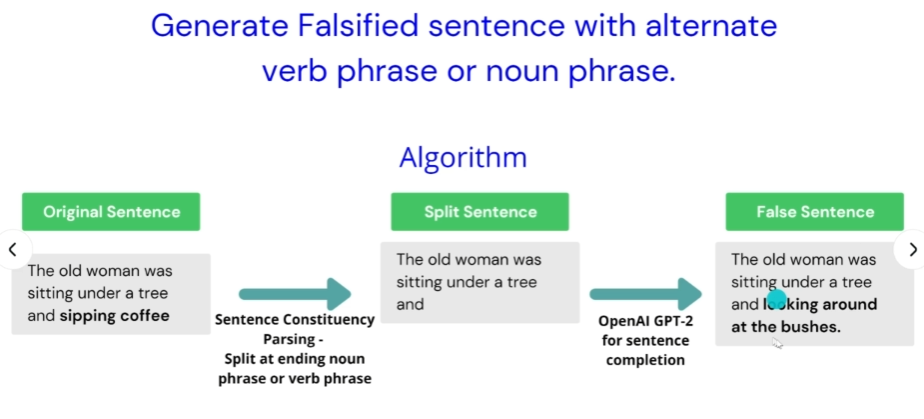

## Constituency Parsing :

* Split the sentence at ending noun phrase or verb phrase

* Constituency Parsing is the process of analyzing the sentences by breaking down it into sub-phrases also known as constituents. 

* These sub-phrases belong to a specific category of grammar like NP (noun phrase) and VP(verb phrase).

* Non terminals in the parse tree are types of phrases.

* The terminals are the words in the parse tree.

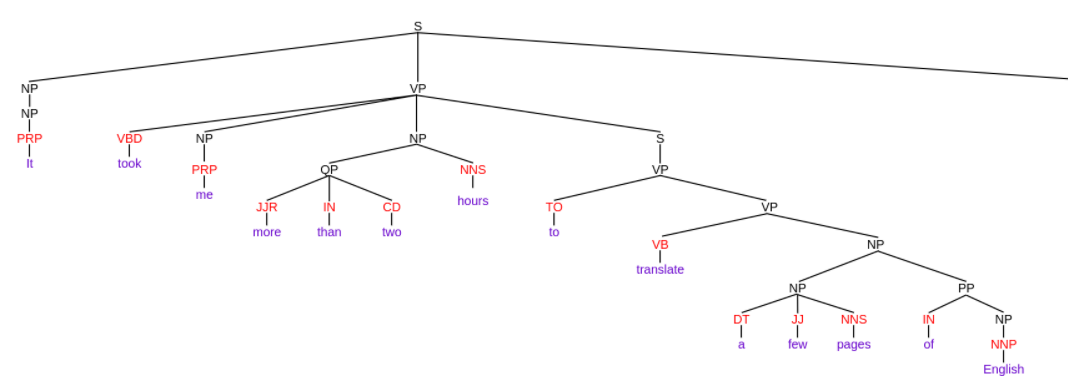

https://demo.allennlp.org/constituency-parsing

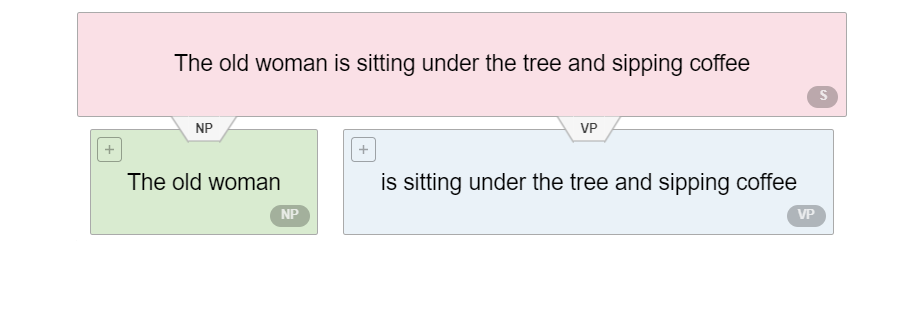

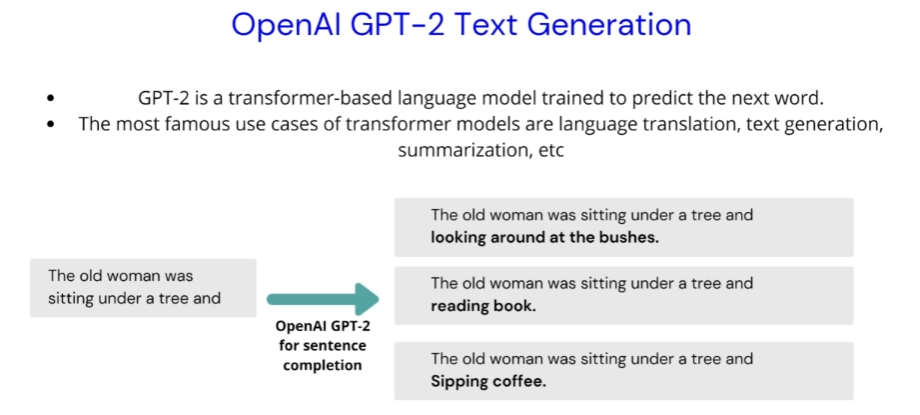

* Open AI - GPT2 is a text generation algorithm 

## Install Allennlp parser to split the sentance at ending noun phrase or verb phrase

In [ ]:
!pip install allennlp==0.9.0
!pip install overrides==4.1.2

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 11.1 MB 6.9 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.1.0-py3-none-any.whl size=11074431 sha256=d0be083fae4db12f14b55c3e518f613059e124b24d9c63dd06144ef0ee3de399
  Stored in directory: /tmp/pip-ephem-wheel-cache-jjnszmv8/wheels/59/4f/8c/0dbaab09a776d1fa3740e9465078bfd903cc22f3985382b496
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")



In [ ]:
from allennlp.predictors.predictor import Predictor
predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/elmo-constituency-parser-2018.03.14.tar.gz")


100%|██████████| 710802195/710802195 [00:14<00:00, 49286421.24B/s]


In [ ]:


test_sentence = "The old woman was sitting under a tree and sipping coffee."
test_sentence = test_sentence.rstrip('?:!.,;')
print (test_sentence)
parser_output = predictor.predict(sentence=test_sentence)
print (parser_output)

Your label namespace was 'pos'. We recommend you use a namespace ending with 'labels' or 'tags', so we don't add UNK and PAD tokens by default to your vocabulary.  See documentation for `non_padded_namespaces` parameter in Vocabulary.


The old woman was sitting under a tree and sipping coffee
{'class_probabilities': [[1.0, 2.2363871865493934e-10, 2.1188825637097862e-15, 6.99162890465386e-15, 5.056980242136621e-15, 3.163912274534164e-12, 6.6677606903702e-14, 4.1598599564984795e-12, 6.378007844087819e-11, 2.7916581806647356e-12, 6.635696766371657e-15, 2.251650878552433e-13, 1.8319451511317197e-09, 5.1168562388483746e-14, 1.8848825278361403e-11, 1.3322669790288844e-12, 7.69998011206953e-15, 6.265783031311756e-12, 3.3667081709293223e-12, 2.0015332978257777e-13, 3.2308040791295678e-12, 1.2262434123666566e-10, 9.285546220816343e-10, 3.8637046036529843e-13, 8.740616330759135e-14, 1.0080940260077248e-13, 7.664719011389598e-13, 3.5253334539769865e-12, 2.2906093458097652e-14, 6.031399338302101e-13, 1.765338222825541e-11, 4.3048474507312307e-11, 2.1693001561740033e-11, 4.3421248042442573e-13, 9.326534770176531e-13, 1.3978192735242256e-11, 4.353593765875352e-13, 8.127009265210261e-13, 3.139919314137929e-12, 7.455675833656361e-12

In [ ]:
tree_string = parser_output["trees"]
print (tree_string)

(S (NP (DT The) (JJ old) (NN woman)) (VP (VBD was) (VP (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree)))) (CC and) (VP (VBG sipping) (NP (NN coffee))))))


In [ ]:
from nltk import tokenize
from nltk.tree import Tree

tree = Tree.fromstring(tree_string)
print (tree)
print (tree.pretty_print())

(S
  (NP (DT The) (JJ old) (NN woman))
  (VP
    (VBD was)
    (VP
      (VP (VBG sitting) (PP (IN under) (NP (DT a) (NN tree))))
      (CC and)
      (VP (VBG sipping) (NP (NN coffee))))))
                            S                                          
      ______________________|________                                   
     |                               VP                                
     |          _____________________|_______                           
     |         |                             VP                        
     |         |                  ___________|________________          
     |         |                 VP               |           |        
     |         |      ___________|___             |           |         
     |         |     |               PP           |           VP       
     |         |     |       ________|___         |      _____|____     
     NP        |     |      |            NP       |     |          NP  
  ___|____   


Links to understand syntactic parsing and related terms:

http://www.cs.cornell.edu/courses/cs474/2004fa/lec1.pdf

http://sameersingh.org/courses/statnlp/wi17/slides/lecture-0207-syntactic-parsing.pdf





S	sentence	

NP	noun phrase	

VP	verb phrase	

PP	prepositional phrase	

Det	determiner	

N	noun	

V	verb	

P	preposition	

VBD - Past Tense Verb

JJ - Adjective

etc

In [ ]:
tree.pretty_print()
temp1 = tree[0]
temp2 = tree[1]
temp3 = tree[-1]
temp1.pretty_print()
temp2.pretty_print()
temp3.pretty_print()

                            S                                          
      ______________________|________                                   
     |                               VP                                
     |          _____________________|_______                           
     |         |                             VP                        
     |         |                  ___________|________________          
     |         |                 VP               |           |        
     |         |      ___________|___             |           |         
     |         |     |               PP           |           VP       
     |         |     |       ________|___         |      _____|____     
     NP        |     |      |            NP       |     |          NP  
  ___|____     |     |      |         ___|___     |     |          |    
 DT  JJ   NN  VBD   VBG     IN       DT      NN   CC   VBG         NN  
 |   |    |    |     |      |        |       |    |     | 

In [ ]:
# split at right most nounphrase or verbphrase

def get_flattened(t):
    sent_str_final = None
    if t is not None:
        sent_str = [" ".join(x.leaves()) for x in list(t)]
        sent_str_final = [" ".join(sent_str)]
        sent_str_final = sent_str_final[0]
    return sent_str_final

def get_right_most_VP_or_NP(parse_tree,last_NP = None,last_VP = None):
    if len(parse_tree.leaves()) == 1:
        return last_NP,last_VP
    last_subtree = parse_tree[-1]
    if last_subtree.label() == "NP":
        last_NP = last_subtree
    elif last_subtree.label() == "VP":
        last_VP = last_subtree
    
    return get_right_most_VP_or_NP(last_subtree,last_NP,last_VP)


last_nounphrase, last_verbphrase =  get_right_most_VP_or_NP(tree)
last_nounphrase_flattened = get_flattened(last_nounphrase)
last_verbphrase_flattened = get_flattened(last_verbphrase)

print ("Original Sentence ",test_sentence)
print ("last_nounphrase ",last_nounphrase )
print ("last_verbphrase ",last_verbphrase)
print ("\n ")
print ("last_nounphrase ",last_nounphrase_flattened )
print ("last_verbphrase ",last_verbphrase_flattened)

Original Sentence  The old woman was sitting under a tree and sipping coffee
last_nounphrase  (NP (NN coffee))
last_verbphrase  (VP (VBG sipping) (NP (NN coffee)))

 
last_nounphrase  coffee
last_verbphrase  sipping coffee


In [ ]:
import re

# sub_string - sipping coffee
# main_string - The old woman was sitting under a tree and sipping coffee
# compare like below
# Theoldwomanwassittingunderatreeandsippingcoffee  || sippingcoffee
# oldwomanwassittingunderatreeandsippingcoffee || sippingcoffee
# womanwassittingunderatreeandsippingcoffee || sippingcoffee
# ...............
# andsippingcoffee || sippingcoffee
# sippingcoffee || sippingcoffee
def get_termination_portion(main_string, sub_string):
    combined_sub_string = sub_string.replace(" ", "")
    main_string_list = main_string.split()
    last_index = len(main_string_list)
    for i in range(last_index):
        check_string_list = main_string_list[i:]
        check_string = "".join(check_string_list)
        check_string = check_string.replace(" ", "")
        if check_string == combined_sub_string:
            return " ".join(main_string_list[:i])

    return None

longest_phrase_to_use = max(last_nounphrase_flattened, last_verbphrase_flattened,key = len)
print ("Ending phrase: ", longest_phrase_to_use)

longest_phrase_to_use = re.sub(r"-LRB- ", "(", longest_phrase_to_use)
longest_phrase_to_use = re.sub(r" -RRB-", ")", longest_phrase_to_use)


split_sentence = get_termination_portion(test_sentence, longest_phrase_to_use)
print ("Original sentence : ",test_sentence)
print ("Original sentence after splitting at ending phrase: ",split_sentence)

Ending phrase:  sipping coffee
Original sentence :  The old woman was sitting under a tree and sipping coffee
Original sentence after splitting at ending phrase:  The old woman was sitting under a tree and


In [ ]:
# split at the first noun phrase or verb phrase

test_sentence2 = "They had no ice cream left at home, nor did they have money to go to the store."
test_sentence2 = test_sentence2.rstrip('?:!.,;')
print (test_sentence2)
parser_output2 = predictor.predict(sentence=test_sentence2)
tree_string2 = parser_output2["trees"]

tree2 = Tree.fromstring(tree_string2)
print (tree2.pretty_print())


They had no ice cream left at home, nor did they have money to go to the store
                                              S                                                    
       _______________________________________|_______                                              
      |                                   |   |       SQ                                           
      |                                   |   |    ___|__________                                   
      |                                   |   |   |   |          VP                                
      |                                   |   |   |   |     _____|________                          
      |                                   |   |   |   |    |              NP                       
      |                                   |   |   |   |    |      ________|___                      
      S                                   |   |   |   |    |     |           SBAR                  
  ____|___       

In [ ]:

# SBAR stands for Subordinate Clause.
#  Penn Tree bank overview - http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.8216&rep=rep1&type=pdf

def get_first_VP_and_NP_and_sentence(parse_tree, first_NP=None, first_VP=None, first_sent=None):
    if len(parse_tree.leaves()) == 1:
        return get_flattened(first_NP), get_flattened(first_VP), get_flattened(first_sent)
    last_subtree = parse_tree[-1]

    if last_subtree.label() == "NP" and not first_NP:
        first_NP = last_subtree
    elif last_subtree.label() == "VP" and not first_VP:
        first_VP = last_subtree
    elif last_subtree.label() == "S" and not first_sent:
        first_sent = last_subtree

    return get_first_VP_and_NP_and_sentence(last_subtree, first_NP, first_VP, first_sent)


first_nounphrase, first_verbphrase, first_sentence = get_first_VP_and_NP_and_sentence(tree2)

print("first_nounphrase: ",first_nounphrase)
print ("first_verbphrase: ",first_verbphrase)
print ("first_sentence: ",first_sentence)


first_nounphrase:  money to go to the store
first_verbphrase:  have money to go to the store
first_sentence:  to go to the store


In [ ]:
longest_phrase_to_use = max(first_nounphrase, first_verbphrase,key = len)
print ("Ending phrase: ", longest_phrase_to_use)

longest_phrase_to_use = re.sub(r"-LRB- ", "(", longest_phrase_to_use)
longest_phrase_to_use = re.sub(r" -RRB-", ")", longest_phrase_to_use)


split_sentence = get_termination_portion(test_sentence2, longest_phrase_to_use)
print ("Original sentence : ",test_sentence2)
print ("Original sentence after splitting at ending phrase: ",split_sentence)

Ending phrase:  have money to go to the store
Original sentence :  They had no ice cream left at home, nor did they have money to go to the store
Original sentence after splitting at ending phrase:  They had no ice cream left at home, nor did they


## 2. Generate alternate endings to a split sentence using GPT-2

In [ ]:
!pip install transformers==2.8.0

     |████████████████████████████████| 563 kB 7.4 MB/s 
     |████████████████████████████████| 5.6 MB 33.3 MB/s 
     |████████████████████████████████| 895 kB 39.9 MB/s 


In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

# GPT2tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
# GPT2model = TFGPT2LMHeadModel.from_pretrained("distilgpt2",pad_token_id=GPT2tokenizer.eos_token_id)
GPT2tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
GPT2model = TFGPT2LMHeadModel.from_pretrained("gpt2",pad_token_id=GPT2tokenizer.eos_token_id)


Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [ ]:
partial_sentence = "The old woman was sitting under a tree and"
input_ids = GPT2tokenizer.encode(partial_sentence,return_tensors='tf')
print (input_ids)
maximum_length = len(partial_sentence.split())+40

tf.Tensor([[ 464 1468 2415  373 5586  739  257 5509  290]], shape=(1, 9), dtype=int32)


In [ ]:
# Activate top_k sampling and top_p sampling with only from 90% most likely words
sample_outputs = GPT2model.generate(
    input_ids, 
    do_sample=True, 
    max_length=maximum_length, 
    top_p=0.80, # 0.85 
    top_k=30,   #30
    repetition_penalty  = 10.0,
    num_return_sequences=10
)

In [ ]:
import nltk
nltk.download('punkt')
from nltk import tokenize
generated_sentences=[]

for i, sample_output in enumerate(sample_outputs):
    decoded_sentence = GPT2tokenizer.decode(sample_output, skip_special_tokens=True)
    # final_sentence = decoded_sentence
    final_sentence = tokenize.sent_tokenize(decoded_sentence)[0]
    generated_sentences.append(final_sentence)
    print (i,": ",final_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
0 :  The old woman was sitting under a tree and looking up.
1 :  The old woman was sitting under a tree and she looked around her.
2 :  The old woman was sitting under a tree and looked down, her eyes locked on the door.
3 :  The old woman was sitting under a tree and had her fingers crossed.
4 :  The old woman was sitting under a tree and staring at me.
5 :  The old woman was sitting under a tree and I asked her, "Who is this?"
6 :  The old woman was sitting under a tree and she had her hand up.
7 :  The old woman was sitting under a tree and her hand moved to the door.
8 :  The old woman was sitting under a tree and staring at the sky with an unreadable expression on her face.
9 :  The old woman was sitting under a tree and staring at the white flag.


## 3. Assignment Solution - Filter sentences with BERT

In [ ]:
# https://pypi.org/project/sentence-transformers/
!pip install sentence-transformers==0.4.0

In [ ]:
from sentence_transformers import SentenceTransformer, util
BERT_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [ ]:
possible_false_sentences = ["The old woman was sitting under a tree and there were four men, each wearing dark clothing.",
                            "The old woman was sitting under a tree and had to look at her face.",
                            "The old woman was sitting under a tree and talking to the other lady, but when she noticed that I could hear myself in front of her with my voice it had gone up.",
                            "The old woman was sitting under a tree and saw him in the middle of nowhere.",
                            "The old woman was sitting under a tree and looking around at the bushes.",
                            "The old woman was sitting under a tree and gulping cocktail.",
                            "The old woman was sitting under a tree and staring at her, making the decision to leave.",
                            "The old woman was sitting under a tree and the man in his thirties came around her with some scissors, sawing it all as if she'd eaten him for lunch.",
                            "The old woman was sitting under a tree and staring at the window.",
                            "The old woman was sitting under a tree and she said, 'You know what?'",
                            "The old woman was sitting under a tree and staring at her like she would become the next, or whatever it looked.",
                            "The old woman was sitting under a tree and drinking tea."]



original_sentence = "The old woman was sitting under a tree and sipping coffee."

print(original_sentence)

The old woman was sitting under a tree and sipping coffee.


In [ ]:
false_sentences_embeddings = BERT_model.encode(possible_false_sentences)
original_sentence_embedding = BERT_model.encode([original_sentence])

In [ ]:
import scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
distances = scipy.spatial.distance.cdist(original_sentence_embedding, false_sentences_embeddings, "cosine")[0]
print (distances)

[0.59552437 0.52261241 0.61013786 0.61484166 0.44246865 0.27653323
 0.44102635 0.63589492 0.38027592 0.38613725 0.50199741 0.23803731]


In [ ]:
results = zip(range(len(distances)), distances)
results = sorted(results, key=lambda x: x[1])
print (results)

[(11, 0.23803730540467827), (5, 0.27653323045375), (8, 0.3802759240467841), (9, 0.3861372465981394), (6, 0.44102634823078823), (4, 0.44246864886721093), (10, 0.5019974059989698), (1, 0.5226124125106939), (0, 0.5955243728200692), (2, 0.6101378550844037), (3, 0.6148416647155683), (7, 0.6358949195712824)]


In [ ]:
dissimilar_sentences =[]
for idx, distance in results:
  dissimilar_sentences.append(possible_false_sentences[idx])
  print (possible_false_sentences[idx])

The old woman was sitting under a tree and drinking tea.
The old woman was sitting under a tree and gulping cocktail.
The old woman was sitting under a tree and staring at the window.
The old woman was sitting under a tree and she said, 'You know what?'
The old woman was sitting under a tree and staring at her, making the decision to leave.
The old woman was sitting under a tree and looking around at the bushes.
The old woman was sitting under a tree and staring at her like she would become the next, or whatever it looked.
The old woman was sitting under a tree and had to look at her face.
The old woman was sitting under a tree and there were four men, each wearing dark clothing.
The old woman was sitting under a tree and talking to the other lady, but when she noticed that I could hear myself in front of her with my voice it had gone up.
The old woman was sitting under a tree and saw him in the middle of nowhere.
The old woman was sitting under a tree and the man in his thirties came 

In [ ]:
false_sentences_list_final = reversed(dissimilar_sentences)
for sent in false_sentences_list_final:
  print (sent)

The old woman was sitting under a tree and the man in his thirties came around her with some scissors, sawing it all as if she'd eaten him for lunch.
The old woman was sitting under a tree and saw him in the middle of nowhere.
The old woman was sitting under a tree and talking to the other lady, but when she noticed that I could hear myself in front of her with my voice it had gone up.
The old woman was sitting under a tree and there were four men, each wearing dark clothing.
The old woman was sitting under a tree and had to look at her face.
The old woman was sitting under a tree and staring at her like she would become the next, or whatever it looked.
The old woman was sitting under a tree and looking around at the bushes.
The old woman was sitting under a tree and staring at her, making the decision to leave.
The old woman was sitting under a tree and she said, 'You know what?'
The old woman was sitting under a tree and staring at the window.
The old woman was sitting under a tree a